In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

<IPython.core.display.Javascript object>

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [5]:
# answer goes here
fwb = pd.read_csv('data/financial_wellbeing.csv')
fwb.head()



,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


<IPython.core.display.Javascript object>

As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [7]:
# answer goes here

scores = fwb.filter(like='score')



<IPython.core.display.Javascript object>

In [8]:
scores

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900
...,...,...,...,...
6389,61,47,3,1.267
6390,59,59,1,-1.215
6391,59,51,2,-1.215
6392,46,54,2,-1.215


<IPython.core.display.Javascript object>

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [19]:
scores["FSscore"].value_counts().sort_index()

-1       4
 5       2
 8       2
 9       1
 10      8
      ... 
 79     44
 80     15
 81     16
 82     46
 85    114
Name: FSscore, Length: 77, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# answer goes here

scores = scores[scores['FWBscore']>0]
scores = scores[scores['FSscore']>0]
scaler = StandardScaler()
scaled = scaler.fit_transform(scores)


<IPython.core.display.Javascript object>

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

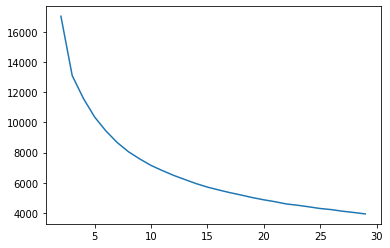

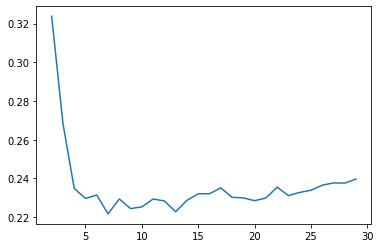

<IPython.core.display.Javascript object>

In [21]:
# answer goes here
inertia_scores = []
sil_scores = []
ks = range(2, 30)
for k in ks:
    clst = KMeans(k)
    clst.fit(scaled)
    inertia = clst.inertia_
    inertia_scores.append(inertia)
    sil_score = silhouette_score(scaled, clst.labels_)
    sil_scores.append(sil_score)

plt.plot(ks, inertia_scores)
plt.show()
plt.plot(ks, sil_scores)
plt.show()

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?